In [1]:
%matplotlib inline
import sys
import time

import numpy as np
import matplotlib.pyplot as plt

# A little about iterators

A neat Python hack we can discuss later

In [2]:
list(zip(*[iter(np.arange(9))]*3))

[(0, 1, 2), (3, 4, 5), (6, 7, 8)]

## Iterables

Iterables are anything that defines the `__iter__` method.  The `__iter__` method is called whenever an iterable is iterated over at the beginning of a for loop.  The `__iter__` method can also be called using the `iter` builtin function.  The `__iter__` method must return an *iterator*.  In general, anything you can iterate over in a for loop is an iterable.

In [3]:
# Lists are iterables
hasattr([1,2,3], '__iter__')

True

In [4]:
# Strings are iterables
hasattr("Hello World", '__iter__')

True

In [5]:
# Range objects are iterables
hasattr(range(5), '__iter__')

True

## Iterators

Iterators are a special type of iterable that define the `__next__` method.  The `__next__` method is a method that returns the next element in the object you are iterating over.  The `__next__` method is called at each loop in a for loop to get the next element.  The `__next__` method can also be called using the `next` builtin function.

Iterators only have knowledge of their next state.  This means that you only have access to the next element to be iterated over.  This means that iterators cannot be sliced or indexed.  Iterators tend to compute their next value only when the value is requested.  This can be used to avoid the overhead of unnecessary caching.

In [6]:
# Lists are not iterators
hasattr([1,2,3], '__next__')

False

In [7]:
# Calling iter on an iterable makes it an iterator
hasattr(iter([1,2,3]), '__next__')

True

In [8]:
# Getting elements from an iterator
iterator = iter("Hi")
print(next(iterator))
print(next(iterator))

H
i


### Bounis: `range` objects

Are `range` objects iterators?

In [9]:
next(range(5))

TypeError: 'range' object is not an iterator

## Writing a custom iterator

We can write an interator as a class.  To do so, we must define the `__iter__` and `__next__` methods.  Since the `__iter__` method must return an iterator and the instance itself is an iterator, we can just return the instance from the `__iter__` method.

The `__next__` method must return the next item in the iterator.  Once there are no more items to be returned, the `__next__` method must raise a `StopIteration` error.  This is a special type of error that Python for loops are aware of.  Once the `StopIteration` error is raised by an iterator, the for loop knows there are no more elements left and stops iterating.

In [10]:
class MyIterator:
    """An iterator that returns sequential positive 
    integers less than or equal to 10
    """
    
    def __init__(self):
        
        # Set some initial value for the iterator
        self.state = 0
    
    def __iter__(self):
        
        # Since `self` is an iterator, we can just return it
        return self
    
    def __next__(self):

        self.state += 1 # Do something to update the object
        if self.state > 10: # Must have some end condition
            raise StopIteration # This causes to iteration to end
        return self.state # This is the next value of the iterator

In [11]:
iterator = MyIterator()

for item in iterator:
    print(item, end=' ')
    
# Notice how we're out of values
for item in iterator:
    print(item, end=' ')

1 2 3 4 5 6 7 8 9 10 

In [12]:
# With this iterator, we can reset the state ourselves
iterator.state = -10
for item in iterator:
    print(item, end=' ')

-9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10 

# Functools

# Partial

In [13]:
from functools import partial

In [14]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



## Print to stderr

In [15]:
print_err = partial(print, file=sys.stderr, flush=True)
print_err("Warning: You've got an Error")

## Loading Icon

In [16]:
loading_msg = partial(print, end='\r', sep='|', flush=True)

loading_msg(' '*26,'')
for i in range(20):
    loading_msg(f'{i+1:>2d}/20', '#'*(i+1))
    time.sleep(0.2)

## CSV File Writer

In [17]:
csv_file = open('test_table.csv', 'w')

csv_writer = partial(print, file=csv_file, sep=',', flush=True)
for _ in range(10):
    csv_writer(*np.random.random(3))

In [18]:
!cat test_table.csv

0.2829549470966546,0.7913389840116397,0.9327735926214271
0.025995044684231083,0.8458335342823904,0.8257285015214271
0.4382653241524628,0.5119143454745039,0.054630762707368885
0.925851683514305,0.11178112685958819,0.7007718678869173
0.1263171467639731,0.08789358250139334,0.19147322222376773
0.8443474866221021,0.4826804558680925,0.1884564193992142
0.9146874700964528,0.13988642448065725,0.6712016632214027
0.7130497724257293,0.09589953063071732,0.8543023732366555
0.39159779585303356,0.0396706530075559,0.8666067811137689
0.20506839227241225,0.13147170114508122,0.41241509045106983


## Log File Writer

In [19]:
logfile = open('my_log.log', 'w')
logger = partial(print, file=logfile, flush=True)


for i in range(20):
    t = time.strftime("%H:%M:%S", time.localtime())
    if not (i % 3):
        logger(t, 'Skipping Iteration: i=', i)
        print_err("Warning: Failed to write to file")
    else:
        logger(t, 'Writing to CSV file')
        csv_writer(*np.arange(3))
    time.sleep(0.2)

In [20]:
!cat my_log.log

10:44:34 Skipping Iteration: i= 0
10:44:34 Writing to CSV file
10:44:35 Writing to CSV file
10:44:35 Skipping Iteration: i= 3
10:44:35 Writing to CSV file
10:44:35 Writing to CSV file
10:44:35 Skipping Iteration: i= 6
10:44:36 Writing to CSV file
10:44:36 Writing to CSV file
10:44:36 Skipping Iteration: i= 9
10:44:36 Writing to CSV file
10:44:36 Writing to CSV file
10:44:37 Skipping Iteration: i= 12
10:44:37 Writing to CSV file
10:44:37 Writing to CSV file
10:44:37 Skipping Iteration: i= 15
10:44:37 Writing to CSV file
10:44:38 Writing to CSV file
10:44:38 Skipping Iteration: i= 18
10:44:38 Writing to CSV file


## A trick with wrappers

In [21]:
@partial(partial, z=5)
def f(x, y, z=4):
    return x, y, z
    
@partial(np.vectorize, signature='(m),(),()->(m)')
def g(x, y, z):
    return x + y * z

print(f(1, 2))
print(g([1, 2], [2, 3], 4))

(1, 2, 5)
[[ 9 10]
 [13 14]]


# Reduce

In [22]:
from functools import reduce

In [23]:
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, sequence[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.
    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the sequence in the calculation, and serves as a default when the
    sequence is empty.



In [37]:
reduce(add, [1,2,3,4])
add(add(1, 2), 3)
add(add(add(1, 2), 3), 4)

10

In [36]:
def add(x, y):
    return x+y

def mul(x, y):
    return x*y

print(reduce(add, range(10))) # same as sum
print(reduce(mul, range(1,5))) # same as factorial

45
24


In [26]:
def print_args(x, y):
    print(y, x)
    return x+y

reduce(print_args, range(10)) # prints the triangular numbers

1 0
2 1
3 3
4 6
5 10
6 15
7 21
8 28
9 36


45

## Remove All Instances of Many Words

In [27]:
def remove_word(sentence, word):
    return sentence.replace(word, '#'*len(word))

sentence = """Python string method replace() 
returns a copy of the string in which the 
occurrences of old have been replaced with 
new, optionally restricting the number of 
replacements to max."""

print(reduce(remove_word, ['new', 'string', 'replacements', 'old', 'max'], sentence))

Python ###### method replace() 
returns a copy of the ###### in which the 
occurrences of ### have been replaced with 
###, optionally restricting the number of 
############ to ###.


# Itertools

In [41]:
def f(x, *args, **kwargs):
    print('x:', x)
    print('args:',args)
    print('kwargs',kwargs)
    
f(1,2,3, a=7, b=8)

x: 1
args: (2, 3)
kwargs {'a': 7, 'b': 8}


In [43]:
*a, b = [1,2,3]
a, b

([1, 2], 3)

In [46]:
(*[1,2,3], 5, 6, 7)

(1, 2, 3, 5, 6, 7)

In [45]:
a,b, c = [1,2,3]
a,b,c

(1, 2, 3)

## Chain

In [28]:
from itertools import chain

In [29]:
items = ['Hello', ' ', 'world']
print(list(chain(*items)))
for i in chain(*items):
    print(i, end='')

['H', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']
Hello world

## Cycle

In [30]:
from itertools import cycle

In [38]:
color_cycle = cycle('rgb')
for _ in range(10):
    print(next(color_cycle), end=' ')

r g b r g b r g b r 

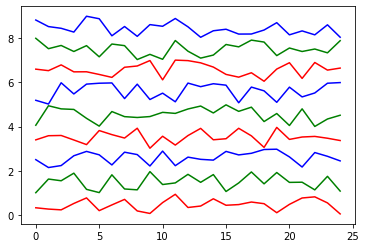

In [32]:
colors = 'rgb'
heights = np.arange(9)
for color, height in zip(cycle(colors), heights):
    plt.plot(np.random.random(25)+height, color=color)

## Repeat

In [33]:
from itertools import repeat

In [34]:
list(repeat(10, 10))

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

['-', '-', '-', ':', ':', ':', '--', '--', '--']


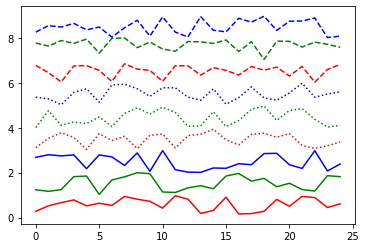

In [39]:
line_styles = list(chain(*(repeat(style, 3) for style in ('-',':','--'))))
print(line_styles)
for color, height, style in zip(cycle(colors), heights, line_styles):
    plt.plot(np.random.random(25)+height, color=color, ls=style)


# Generators

## Comprehension

In [ ]:
storage = []
for i in [1,2,3]:
    storage.append(i)
    
#storage = [i for i in [1,2,3] if not i%2 for j in range(5)]


In [ ]:
storage

In [ ]:
mu = 1
sigma = 0.5
zscore = [(x-mu)/sigma for x in np.random.randn(10)*sigma+mu]
print(zscore)

In [ ]:
zscore_gen = ((x-mu)/sigma for x in np.random.randn(10)*sigma+mu)
print(zscore_gen)

In [ ]:
print(next(zscore_gen))

In [ ]:
for z in zscore_gen:
    print(z)

In [ ]:
for z in zscore_gen:
    print(zscore_gen)

In [ ]:
print(next(zscore_gen))

## yield

### Basic Generator

In [ ]:
def range_squared(N):
    for i in range(N):
        yield i**2

In [ ]:
rs = range_squared(3)
print(next(rs))
print(next(rs))
print(next(rs))

In [ ]:
print(next(rs))

In [ ]:
for i in range_squared(5):
    print(i, end=' ')

### Speeding up high memory operations

In [ ]:
def create_data(N):
    data_array = []
    for _ in range(N):
        data_array.append(np.random.random(100000))
    return data_array

def generate_data(N):
    for _ in range(N):
        yield np.random.random(100000)

In [ ]:
%%timeit

for data in create_data(1000):
    pass

In [ ]:
%%timeit

for data in generate_data(1000):
    pass

### Making IO operations more efficient

In [ ]:
import os


def get_text(path):
    lines = []
    for root, dirs, files in os.walk(path):
        for filename in files:
            if filename.endswith('.py'):
                with open(os.path.join(root, filename), 'r') as f:
                    for line in f:
                        lines.append(line)
    return lines
                        
def gen_text(path):
    for root, dirs, files in os.walk(path):
        for filename in files:
            if filename.endswith('.py'):
                with open(os.path.join(root, filename)) as f:
                    yield from f

In [ ]:
%%timeit

comment_count = 0
for line in get_text(np.__path__[0]):
    if '#' in line:
        comment_count += 1


In [ ]:
%%timeit

comment_count = 0
for line in gen_text(np.__path__[0]):
    if '#' in line:
        comment_count += 1

### Concatentation Tricks

In [ ]:
*def hstack(A, B):
    for a in A:
        yield a
    for b in B:
        yield b
        
print(list(hstack('Hello', ' world')))

### Flattening Tricks

In [ ]:
def flatten_1d(A):
    for a in A:
        yield from a

print(list(flatten_1d(np.arange(9).reshape(3,3))))

### Messing with Memory

In [ ]:
def editable_data(N):
    cache = np.random.random(5)
    for _ in range(N):
        cache += 1
        yield cache

In [ ]:
data_generator = editable_data(5)

current_data = next(data_generator)
print(current_data)

In [ ]:
current_data -= 10
print(next(data_generator))

In [ ]:
%matplotlib inline
series = np.empty((20, 5))

for i, data in enumerate(editable_data(20)):
    data *= 0.5
    series[i] = data[::]
    
plt.plot(series);

### Cleaner Integrators

In [ ]:
def F(x):
    # What's the solution?
    return -5*x

def euler_integrator(x0, v0, dt, T):
    
    times = np.arange(0, T, dt)
    x = np.empty_like(times)
    v = np.empty_like(times)
    a = np.empty_like(times)
    
    x[0], v[0], a[0] = x0, v0, F(x0)
 
    for i, t in enumerate(times[1:]):
        x[i+1] = x[i] + v[i] * dt + 0.5*a[i] * dt**2
        v[i+1] = v[i] + a[i] * dt
        a[i+1] = F(x[i+1])
        
    return x, v, a, times

def euler_generator(x0, v0, dt, T):
    
    t, x, v = 0, x0, v0
    
    while t < T:
        a = F(x)
        t += dt
        x += v * dt + 0.5 * a * dt**2
        v += a * dt
        yield x, v, a, t
    
    

In [ ]:
result = euler_integrator(5, 2, 0.001, 4)
plt.plot(result[3], result[0], label='original')


result = np.array(list(zip(*euler_generator(5, 2, 0.001, 4))))
plt.plot(result[3], result[0], ls='--', label='generator')

plt.legend();

#### Say you only want the last result or want to use a callback

In [ ]:
%%timeit

result = np.array(euler_integrator(5, 2, 0.001, 4))[:, -1]

In [ ]:
%%timeit

for i in euler_generator(5, 2, 0.001, 4):
    result = i

### Drinking Games!

In [ ]:
 def fizzbuzz_round(i):
    if (i % 3) and (i % 5):
        yield str(i)
    if not (i % 3):
        yield 'fizz'
    if not (i % 5):
        yield 'buzz'

def fizzbuzz(N):
    for i in range(1, N+1):
        yield ''.join(fizzbuzz_round(i))
            
for item in fizzbuzz(20):
    print(item)

### Monte Carlo

In [ ]:
data = np.linspace(-10, 10, 100)*5+2
sigma = np.sqrt(data.mean())
noise = np.random.randn(100)*sigma
data += noise


def F(x, y):
    
    return np.linspace(-10, 10, 100)*x+y

def compute_chi2(x0, mu, sigma, N):
    
    x = x0.copy()
    for _ in range(N):
        yield x, np.sum((F(*x)-mu)**2)/sigma**2

def metropolis_iterator(x0, N, n_burn):
    
    chi2_0, x0 = np.inf, np.array(x0)
    for i, (x, chi2) in enumerate(compute_chi2(x0, data, sigma, N)):
        
        if i > n_burn:
            yield x.copy()
        
        if chi2 - chi2_0 < np.log(np.random.random()):
            chi2_0, x0[:] = chi2, x
        
        x[:] = x0 + np.random.randn(2)

In [ ]:
walkers = np.array(list(metropolis_iterator([10.0, 0.0], 10000, 1000)))
mean = walkers.mean(axis=0)
std = walkers.std(axis=0)

plt.scatter(walkers[:, 0], walkers[:, 1], s=10, alpha=0.25, edgecolor='None', color='k');

plt.figure()

plt.scatter(np.arange(100), data, s=10, edgecolor='None', color='k')
plt.plot(F(*walkers.mean(axis=0)), ls='--')
plt.fill_between(np.arange(100), F(*(mean+std)), F(*(mean-std)), color='gray', alpha=0.5)

### Concurrency!

In [ ]:
def run_procs_concurrent(*procs):
    results = {proc:[] for proc in procs}
    flags = {proc: 1 for proc in procs}
    while any(flags.values()):
        for proc in procs:
            if flags[proc]:
                try:
                    results[proc].append(next(proc))
                except StopIteration:
                    yield results[proc]
                    flags[proc] = 0


In [ ]:
runners = (metropolis_iterator([10.0-i, 0.0+i], 10000, 9000) for i in range(10))
results = run_procs_concurrent(*runners)
results

In [ ]:
walkers = reduce(hstack, results)
all_walkers = np.array(list(walkers))
plt.scatter(all_walkers[:, 0], all_walkers[:, 1], s=10, alpha=0.25, edgecolor='None', color='k');

# What Should I Do Next Time? 

* Extend this notebook with Coroutines and AsyncIO

* Generating Colors using matplotlib, palettable, and elbow grease

* Python debugging with `breakpoint`